# **Data Pre-processing**

In [1]:
# Random Seed for Under-sampling, Data-split and Modeling
a = 42
b = 42
c = 42

### **Import Libraries**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Circle, Ellipse, Polygon, Wedge, Arrow

import numpy as np
import pandas as pd
import random

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Load Dataset**

In [4]:
# data = pd.read_csv('/content/drive/MyDrive/Dataset/train_dataset.zip')
data = pd.read_csv('/content/drive/MyDrive/Dataset/deepslice_data.csv.zip')
data

,Unnamed: 0,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,slice Type
0,1,Smartphone,1,LTE/5G,sunday,1,Non-GBR,0.010000,100,eMBB
1,2,Smartphone,1,LTE/5G,sunday,2,Non-GBR,0.010000,100,eMBB
2,3,Smartphone,1,LTE/5G,sunday,3,Non-GBR,0.010000,100,eMBB
3,4,Smartphone,1,LTE/5G,sunday,4,Non-GBR,0.010000,100,eMBB
4,5,Smartphone,1,LTE/5G,sunday,5,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...,...,...,...,...
63162,63163,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,19,Non-GBR,0.000001,10,URLLC
63163,63164,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,20,Non-GBR,0.000001,10,URLLC
63164,63165,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,21,Non-GBR,0.000001,10,URLLC
63165,63166,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,22,Non-GBR,0.000001,10,URLLC


In [5]:
data_backup = data
data_backup

,Unnamed: 0,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,slice Type
0,1,Smartphone,1,LTE/5G,sunday,1,Non-GBR,0.010000,100,eMBB
1,2,Smartphone,1,LTE/5G,sunday,2,Non-GBR,0.010000,100,eMBB
2,3,Smartphone,1,LTE/5G,sunday,3,Non-GBR,0.010000,100,eMBB
3,4,Smartphone,1,LTE/5G,sunday,4,Non-GBR,0.010000,100,eMBB
4,5,Smartphone,1,LTE/5G,sunday,5,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...,...,...,...,...
63162,63163,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,19,Non-GBR,0.000001,10,URLLC
63163,63164,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,20,Non-GBR,0.000001,10,URLLC
63164,63165,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,21,Non-GBR,0.000001,10,URLLC
63165,63166,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,22,Non-GBR,0.000001,10,URLLC


### **Data Cleaning**

In [6]:
data.columns.tolist()

['Unnamed: 0',
 'Use Case',
 'LTE/5g Category',
 'Technology Supported',
 'Day',
 'Time',
 'GBR',
 'Packet Loss Rate',
 'Packet delay',
 'slice Type']

In [7]:
data['LTE/5g Category'].value_counts()

,count
LTE/5g Category,
2,3024
3,3024
5,3024
4,3024
6,3024
7,3024
15,3024
8,3024
9,3024


In [8]:
data['Technology Supported'].value_counts()

,count
Technology Supported,
LTE/5G,33599
"IoT(LTE-M, NB-IoT)",29568


In [9]:
data = data.drop(data.columns[0], axis=1)
data

,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,slice Type
0,Smartphone,1,LTE/5G,sunday,1,Non-GBR,0.010000,100,eMBB
1,Smartphone,1,LTE/5G,sunday,2,Non-GBR,0.010000,100,eMBB
2,Smartphone,1,LTE/5G,sunday,3,Non-GBR,0.010000,100,eMBB
3,Smartphone,1,LTE/5G,sunday,4,Non-GBR,0.010000,100,eMBB
4,Smartphone,1,LTE/5G,sunday,5,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...,...,...,...
63162,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,19,Non-GBR,0.000001,10,URLLC
63163,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,20,Non-GBR,0.000001,10,URLLC
63164,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,21,Non-GBR,0.000001,10,URLLC
63165,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,22,Non-GBR,0.000001,10,URLLC


In [10]:
data = data.drop(['LTE/5g Category','Day','Time'], axis=1)
data

,Use Case,Technology Supported,GBR,Packet Loss Rate,Packet delay,slice Type
0,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
1,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
2,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
3,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
4,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...
63162,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC
63163,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC
63164,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC
63165,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC


### **Data Distribution by "Use Case"**

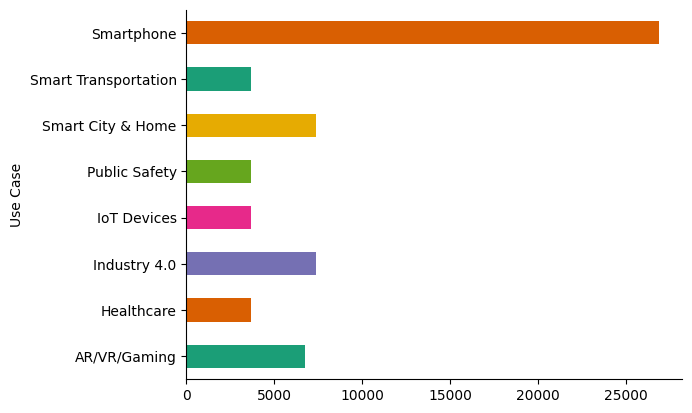

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Use Case').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Conversion of Feature Columns (Categorial to Numerical)**

using one-hot encoding

In [12]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Use Case', 'Technology Supported', 'GBR'])
one_hot_encoded_data

,Packet Loss Rate,Packet delay,slice Type,Use Case_AR/VR/Gaming,Use Case_Healthcare,Use Case_Industry 4.0,Use Case_IoT Devices,Use Case_Public Safety,Use Case_Smart City & Home,Use Case_Smart Transportation,Use Case_Smartphone,"Technology Supported_IoT(LTE-M, NB-IoT)",Technology Supported_LTE/5G,GBR_GBR,GBR_Non-GBR
0,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
1,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
2,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
3,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
4,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63163,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63164,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63165,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True


In [13]:
data_ohe = one_hot_encoded_data.rename(columns={'Use Case_AR/VR/Gaming':'AR/VR/Gaming','Use Case_Healthcare':'Healthcare','Use Case_Industry 4.0':'Industry 4.0','Use Case_IoT Devices':'IoT Devices','Use Case_Public Safety':'Public Safety','Use Case_Smart City & Home':'Smart City & Home','Use Case_Smart Transportation':'Smart Transportation','Use Case_Smartphone':'Smartphone','Technology Supported_IoT(LTE-M, NB-IoT)':'IoT','Technology Supported_LTE/5G':'LTE/5G','GBR_GBR':'GBR','GBR_Non-GBR':'Non-GBR'})
data_ohe

,Packet Loss Rate,Packet delay,slice Type,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,IoT,LTE/5G,GBR,Non-GBR
0,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
1,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
2,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
3,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
4,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63163,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63164,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63165,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True


In [14]:
data = data_ohe[['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone', 'slice Type']]
data

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
1,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
2,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
3,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
4,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC
63163,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC
63164,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC
63165,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC


In [15]:
# Replace boolean values with 0 and 1 in specified columns
columns_to_convert = ["IoT", "LTE/5G", "GBR", "Non-GBR", "AR/VR/Gaming", "Healthcare", "Industry 4.0", "IoT Devices", "Public Safety", "Smart City & Home", "Smart Transportation", "Smartphone"]
for column in columns_to_convert:
    data[column] = data[column].replace({False: 0, True: 1})

data

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
1,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
2,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
3,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
4,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC
63163,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC
63164,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC
63165,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC


### **Class Distribution Analysis**

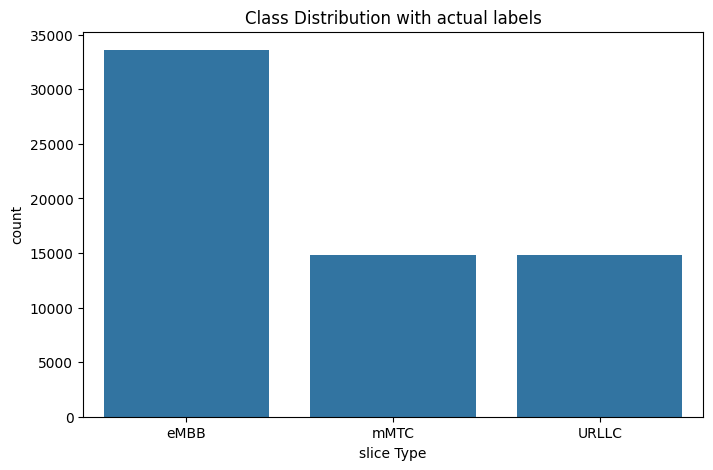

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['slice Type'])
plt.title('Class Distribution with actual labels')
plt.show()

#### Heatmaps

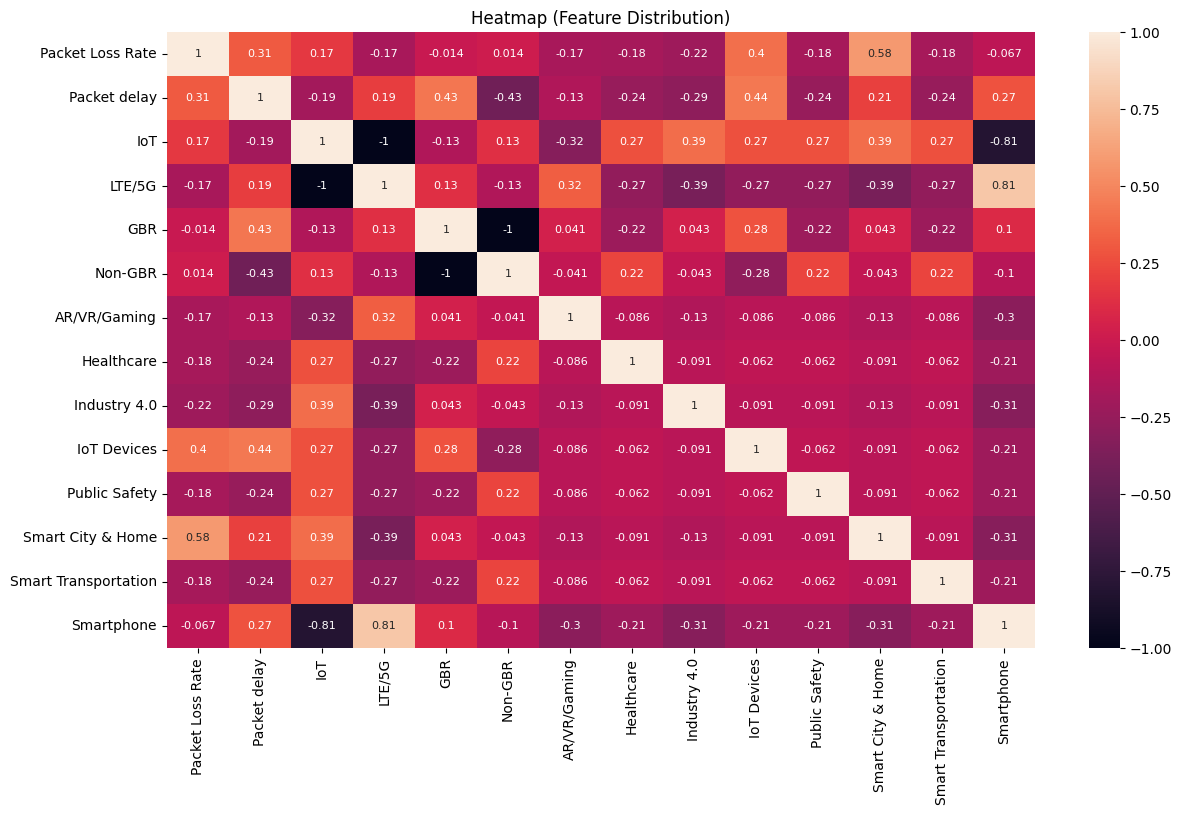

In [17]:
# Create a heatmap for the correlation matrix of all features
plt.figure(figsize=(14, 8))
sns.heatmap(data.iloc[:, :-1].corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution)')
plt.show()

#### **Under Sampling - Class Imbalance Issue**

In [18]:
print(a)

42


In [19]:
# Identify the majority class
majority_class = data['slice Type'].value_counts().idxmax()
print("Majority Class: ", majority_class)

# Count the number of data points in the majority class
majority_count = data['slice Type'].value_counts()[majority_class]
print("Majority Class Count: ", majority_count)

# Count the number of data points in the other two classes
minority_count = data['slice Type'].value_counts().min()
print("Minority Class Count: ", minority_count)

# Calculate the number of data points to remove from the majority class
num_to_remove = majority_count - minority_count
print("Amount of Data to be removed: ", num_to_remove)

# Randomly select data points from the majority class to remove
majority_indices = data[data['slice Type'] == majority_class].index
np.random.seed(a)
remove_indices = np.random.choice(majority_indices, size=num_to_remove, replace=False)
print("Indices to be removed: \n", remove_indices[:100])

# Remove the selected data points from the DataFrame
balanced_data = data.drop(remove_indices)

Majority Class:  eMBB
Majority Class Count:  33599
Minority Class Count:  14784
Amount of Data to be removed:  18815
Indices to be removed: 
 [21034 12483  7475 24075  3184 27826 20096 18839 29422   991 30275  4968
  6585 11769 15609 33420  4982 10201  3230 26437 27971  9378 10491 27754
 12772 30208 25736  6355 19321  3427 20036 31048  2346  2135 33284  1738
 31282 17676  1866 26451 18397 22845 18410 31488 18808 12407 14985 14401
 32270 29100 10496  1912 30295 18269  2532  8344 23114 18605 28688 17919
  1118 14332  1516 21284 13154 19682 22937 23346 19861  9857 13360  6502
  6531 29470  7565 21244 17545 33129 30861 30579 10927  4189 25475  4305
 32193  2527  2168  8085  6267 24137  7889 26752  1448 25970 21237 19980
 22801  5388 33044 27818]


In [20]:
data = balanced_data
data.head(20)

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
1,0.01,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
2,0.01,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
9,0.01,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
10,0.01,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
11,0.01,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
12,0.01,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
13,0.01,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
15,0.01,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
16,0.01,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
18,0.01,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB


In [21]:
data = data.reset_index(drop=True)
data.head(20)

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,0.01,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
1,0.01,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
2,0.01,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
3,0.01,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
4,0.01,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
5,0.01,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
6,0.01,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
7,0.01,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
8,0.01,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
9,0.01,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB


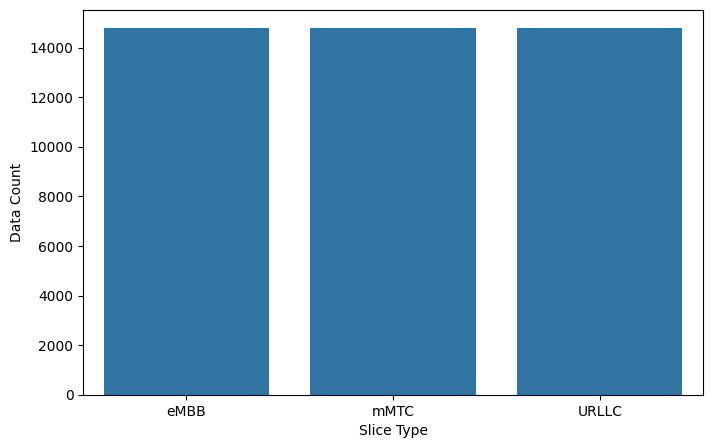

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['slice Type'])
# plt.title('Balanced Class Distribution with actual labels')
plt.xlabel('Slice Type')
plt.ylabel('Data Count')
plt.show()

#### Heatmaps

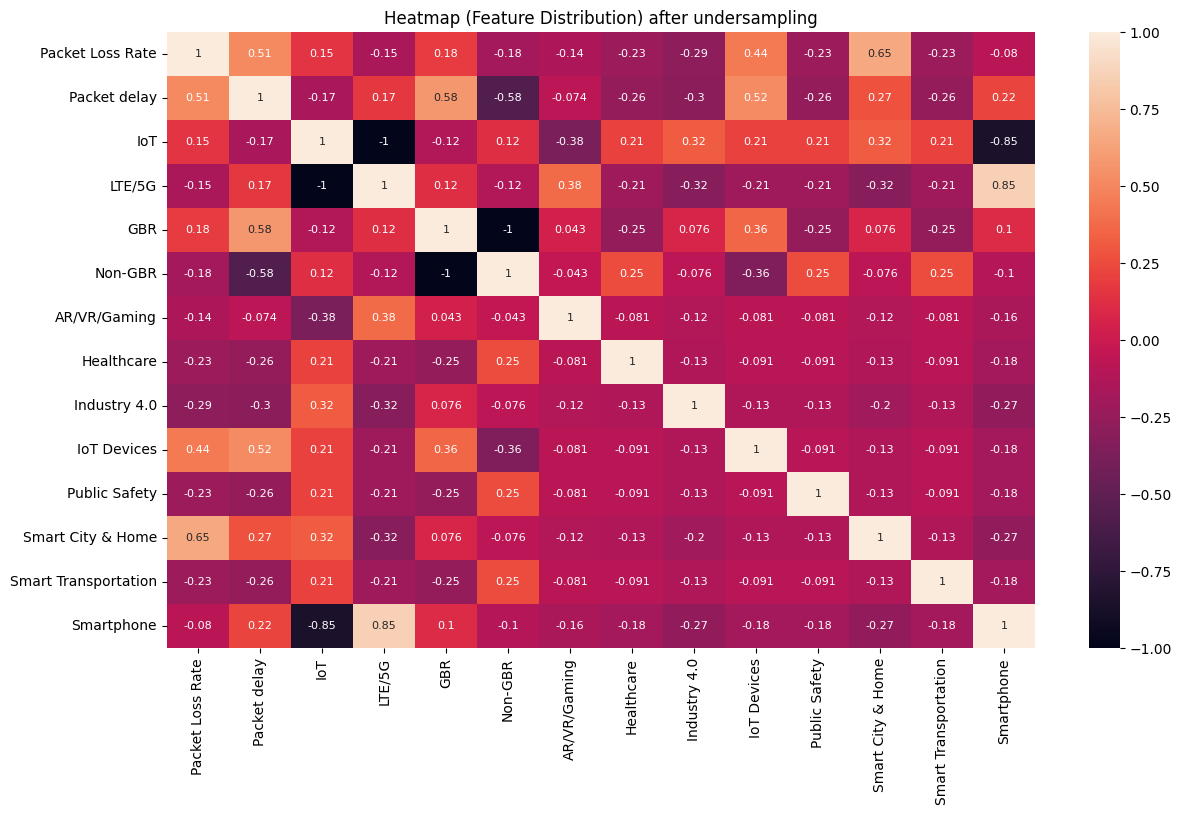

In [23]:
# Create a heatmap for the correlation matrix of all features after undersampling
plt.figure(figsize=(14, 8))
sns.heatmap(data.iloc[:, :-1].corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution) after undersampling')
plt.show()

### **Relevant Feature Selection**

In [24]:
# Select relevant features for clustering (excluding LTE/5g Category and Time)
# X = data.drop(['LTE/5g Category', 'Time'], axis=1)
# features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone']
features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'Packet delay']
# features = ['Packet Loss Rate']

#### Heatmaps

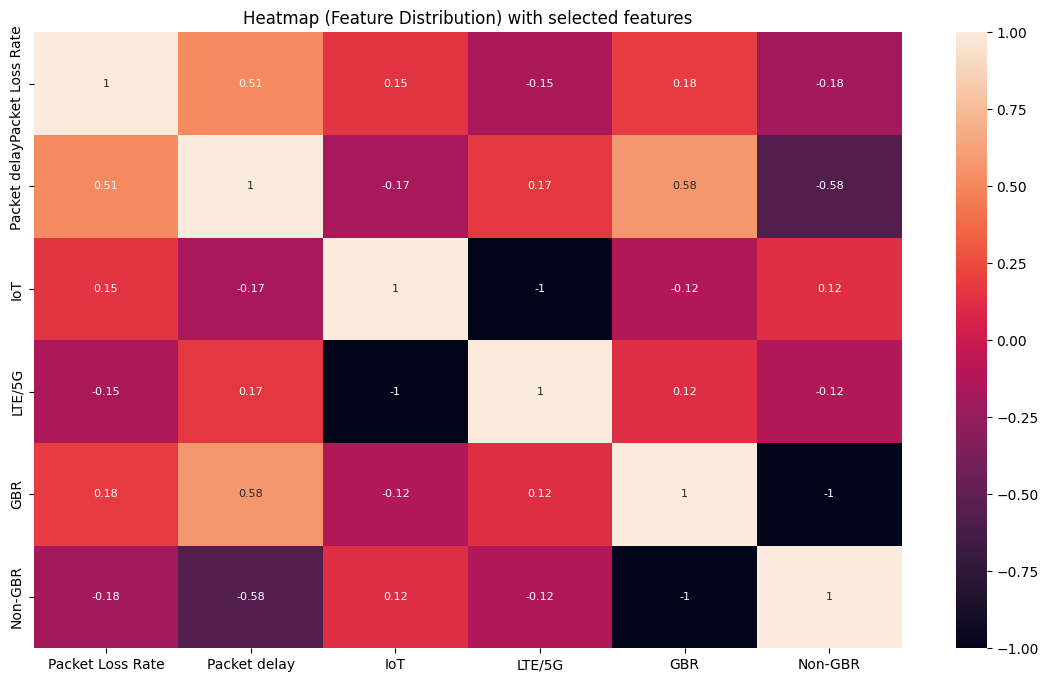

In [25]:
# Create a heatmap for the correlation matrix of all selected features
plt.figure(figsize=(14, 8))
sns.heatmap(data[features].corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution) with selected features')
plt.show()

### **Define X and y**

In [26]:
X = data[features]
X

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
0,0.010000,100,0,1,0,1
1,0.010000,100,0,1,0,1
2,0.010000,100,0,1,0,1
3,0.010000,100,0,1,0,1
4,0.010000,100,0,1,0,1
...,...,...,...,...,...,...
44347,0.000001,10,1,0,0,1
44348,0.000001,10,1,0,0,1
44349,0.000001,10,1,0,0,1
44350,0.000001,10,1,0,0,1


In [27]:
y = data['slice Type']
y

,slice Type
0,eMBB
1,eMBB
2,eMBB
3,eMBB
4,eMBB
...,...
44347,URLLC
44348,URLLC
44349,URLLC
44350,URLLC


### **Apply t-sne to X**

In [28]:
X_backup = X
X_backup

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
0,0.010000,100,0,1,0,1
1,0.010000,100,0,1,0,1
2,0.010000,100,0,1,0,1
3,0.010000,100,0,1,0,1
4,0.010000,100,0,1,0,1
...,...,...,...,...,...,...
44347,0.000001,10,1,0,0,1
44348,0.000001,10,1,0,0,1
44349,0.000001,10,1,0,0,1
44350,0.000001,10,1,0,0,1


In [29]:
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
X_tsne = tsne.fit_transform(X)
X_tsne

array([[  62.887115 , -202.28111  ],
       [  62.887115 , -202.28111  ],
       [  62.887115 , -202.28111  ],
       ...,
       [-115.81515  ,    2.2983513],
       [-115.81515  ,    2.2983513],
       [-115.81515  ,    2.2983513]], dtype=float32)

In [30]:
X = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1]})
X

,Feature 1,Feature 2
0,62.887115,-202.281113
1,62.887115,-202.281113
2,62.887115,-202.281113
3,62.887115,-202.281113
4,62.887115,-202.281113
...,...,...
44347,-115.815147,2.298351
44348,-115.815147,2.298351
44349,-115.815147,2.298351
44350,-115.815147,2.298351


#### Pair Plots

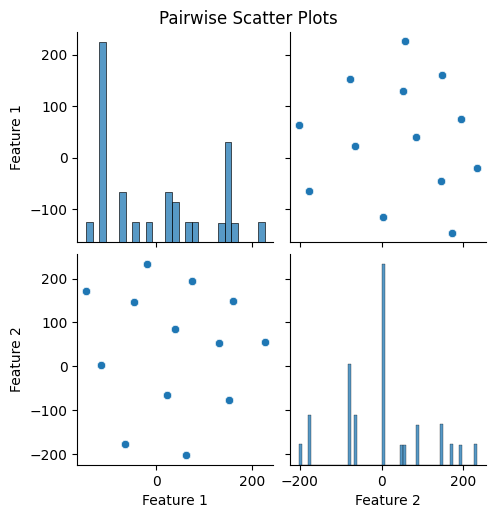

In [31]:
sns.pairplot(X)
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

In [32]:
data = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1], 'slice Type': y})
data

,Feature 1,Feature 2,slice Type
0,62.887115,-202.281113,eMBB
1,62.887115,-202.281113,eMBB
2,62.887115,-202.281113,eMBB
3,62.887115,-202.281113,eMBB
4,62.887115,-202.281113,eMBB
...,...,...,...
44347,-115.815147,2.298351,URLLC
44348,-115.815147,2.298351,URLLC
44349,-115.815147,2.298351,URLLC
44350,-115.815147,2.298351,URLLC


In [33]:
features = ['Feature 1', 'Feature 2']

####################################################################################################
### **Define Unlabelled and Labelled Dataset**
####################################################################################################

In [34]:
# Split the dataset into training and testing sets
# X_labelled = X_train
# X_unlabelled = X_test
# y_labelled = y_train
# y_unlabelled = y_test

X_labelled, X_unlabelled, y_labelled, y_unlabelled = train_test_split(X,y, train_size=0.5, random_state=b)

In [35]:
X_labelled

,Feature 1,Feature 2
26953,-115.815147,2.298351
3415,130.110672,52.006916
35615,152.200500,-77.581436
169,62.887115,-202.281113
3034,130.110672,52.006916
...,...,...
6265,226.130371,55.945343
11284,161.022873,147.842468
38158,-65.404762,-177.192078
860,62.887115,-202.281113


In [36]:
X_unlabelled

,Feature 1,Feature 2
33965,152.200500,-77.581436
32494,-115.815147,2.298351
39397,-65.404762,-177.192078
12000,-146.477142,172.179214
39600,-65.404762,-177.192078
...,...,...
14923,152.200500,-77.581436
18225,152.200500,-77.581436
27630,-115.815147,2.298351
3484,130.110672,52.006916


### **Ground Truth Calculation**

In [37]:
# Get the column names from the original DataFrame
X_labelled_column_names = X_labelled.columns.tolist()
X_labelled_column_names

['Feature 1', 'Feature 2']

In [38]:
# Convert X_unlabelled to a pandas DataFrame
X_labelled_df = pd.DataFrame(X_labelled, columns=X_labelled_column_names)  # Replace X_unlabelled_column_names with your actual column names
data_labelled = X_labelled_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
data_labelled.reset_index(drop=True, inplace=True)
y_labelled.reset_index(drop=True, inplace=True)
y_labelled = pd.Series(y_labelled, name='slice Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
data_labelled['slice Type'] = y_labelled

data_labelled

,Feature 1,Feature 2,slice Type
0,-115.815147,2.298351,URLLC
1,130.110672,52.006916,eMBB
2,152.200500,-77.581436,mMTC
3,62.887115,-202.281113,eMBB
4,130.110672,52.006916,eMBB
...,...,...,...
17735,226.130371,55.945343,eMBB
17736,161.022873,147.842468,eMBB
17737,-65.404762,-177.192078,mMTC
17738,62.887115,-202.281113,eMBB


#### **Ground Truth Slice 1**

In [39]:
# Group data by label "slice 1"
grouped_data_slice1 = data_labelled[data_labelled['slice Type'] == 'eMBB']
grouped_data_slice1

,Feature 1,Feature 2,slice Type
1,130.110672,52.006916,eMBB
3,62.887115,-202.281113,eMBB
4,130.110672,52.006916,eMBB
8,40.009834,84.151390,eMBB
15,161.022873,147.842468,eMBB
...,...,...,...
17727,62.887115,-202.281113,eMBB
17728,75.148155,194.881058,eMBB
17735,226.130371,55.945343,eMBB
17736,161.022873,147.842468,eMBB


In [40]:
# Create 14-dimensional vectors
grouped_data_slice1_vec = grouped_data_slice1[features].values
grouped_data_slice1_vec

array([[ 130.11067 ,   52.006916],
       [  62.887115, -202.28111 ],
       [ 130.11067 ,   52.006916],
       ...,
       [ 226.13037 ,   55.945343],
       [ 161.02287 ,  147.84247 ],
       [  62.887115, -202.28111 ]], dtype=float32)

In [41]:
# Calculate Average
GT_slice1 = np.mean(grouped_data_slice1_vec, axis=0)
GT_slice1

array([53.052948, 97.02213 ], dtype=float32)

#### **Ground Truth Slice 2**

In [42]:
# Group data by label "slice 2"
grouped_data_slice2 = data_labelled[data_labelled['slice Type'] == 'mMTC']
grouped_data_slice2

,Feature 1,Feature 2,slice Type
2,152.200500,-77.581436,mMTC
5,23.389521,-64.629578,mMTC
7,152.200500,-77.581436,mMTC
9,-65.404762,-177.192078,mMTC
10,-65.404762,-177.192078,mMTC
...,...,...,...
17730,152.200500,-77.581436,mMTC
17733,-65.404762,-177.192078,mMTC
17734,152.200500,-77.581436,mMTC
17737,-65.404762,-177.192078,mMTC


In [43]:
# Create 14-dimensional vectors
grouped_data_slice2_vec = grouped_data_slice2[features].values
grouped_data_slice2_vec

array([[ 152.2005  ,  -77.581436],
       [  23.38952 ,  -64.62958 ],
       [ 152.2005  ,  -77.581436],
       ...,
       [ 152.2005  ,  -77.581436],
       [ -65.40476 , -177.19208 ],
       [ 152.2005  ,  -77.581436]], dtype=float32)

In [44]:
# Calculate Average
GT_slice2 = np.mean(grouped_data_slice2_vec, axis=0)
GT_slice2

array([ 66.712685, -98.462524], dtype=float32)

#### **Ground Truth Slice 3**

In [45]:
# Group data by label "slice 3"
grouped_data_slice3 = data_labelled[data_labelled['slice Type'] == 'URLLC']
grouped_data_slice3

,Feature 1,Feature 2,slice Type
0,-115.815147,2.298351,URLLC
6,-115.815147,2.298351,URLLC
11,-115.815147,2.298351,URLLC
17,-115.815147,2.298351,URLLC
18,-115.815147,2.298351,URLLC
...,...,...,...
17720,-115.815147,2.298351,URLLC
17721,-115.815147,2.298351,URLLC
17729,-115.815147,2.298351,URLLC
17731,-115.815147,2.298351,URLLC


In [46]:
# Create 14-dimensional vectors
grouped_data_slice3_vec = grouped_data_slice3[features].values
grouped_data_slice3_vec

array([[-115.81515  ,    2.2983513],
       [-115.81515  ,    2.2983513],
       [-115.81515  ,    2.2983513],
       ...,
       [-115.81515  ,    2.2983513],
       [-115.81515  ,    2.2983513],
       [-115.81515  ,    2.2983513]], dtype=float32)

In [47]:
# Calculate Average
GT_slice3 = np.mean(grouped_data_slice3_vec, axis=0)
GT_slice3

array([-115.815155 ,    2.2983513], dtype=float32)

#### **Plot Ground Truth**

In [48]:
# Combine the centroids into a single array
GT_centroids = np.vstack((GT_slice1, GT_slice2, GT_slice3))
GT_centroids

array([[  53.052948 ,   97.02213  ],
       [  66.712685 ,  -98.462524 ],
       [-115.815155 ,    2.2983513]], dtype=float32)

In [49]:
# # Testing the for loop
# for cluster in range(1, len(np.unique(data['slice Type']))+1):
#     cluster_data = data[data['slice Type'] == cluster]
#     print(cluster, "\n",cluster_data, "\n")

In [50]:
data_labelled['slice Type'].unique()

array(['URLLC', 'eMBB', 'mMTC'], dtype=object)

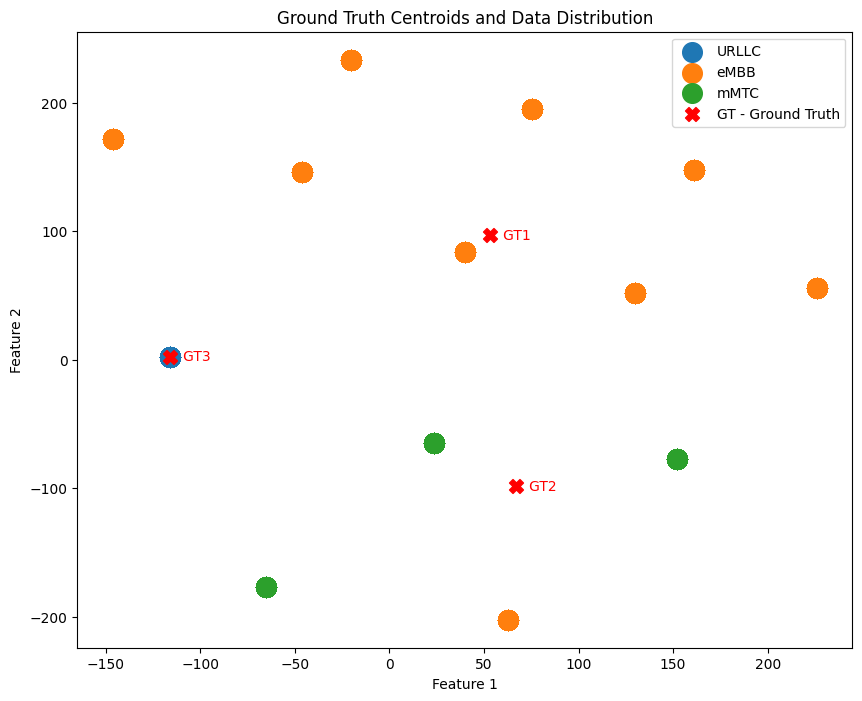

In [51]:
# Plot the scatter plot with different colors for each class
plt.figure(figsize=(10, 8))

slice_types = data_labelled['slice Type'].unique();
for slice_type in slice_types:
    cluster_data = data_labelled[data_labelled['slice Type'] == slice_type]
    plt.scatter(cluster_data[data_labelled.columns[0]], cluster_data[data_labelled.columns[1]], s=200, label=slice_type)

# Plot the Ground Truth Centroids
plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
for i, centroid in enumerate(GT_centroids):
    plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

plt.xlabel(data_labelled.columns[0])
plt.ylabel(data_labelled.columns[1])
plt.title('Ground Truth Centroids and Data Distribution')
plt.legend()
# plt.xlim(-200, 200)  # Set your desired x-axis range
# plt.ylim(-200, 200)  # Set your desired y-axis range
plt.show()

### **Datasplit - X, X_train and X_test**

In [52]:
print(b)

42


In [53]:
# Get the column names from the original DataFrame
X_unlabelled_column_names = X_unlabelled.columns.tolist()
X_unlabelled_column_names

['Feature 1', 'Feature 2']

In [54]:
# Convert X_unlabelled to a pandas DataFrame
X_unlabelled_df = pd.DataFrame(X_unlabelled, columns=X_unlabelled_column_names)  # Replace X_unlabelled_column_names with your actual column names
data_unlabelled = X_unlabelled_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
data_unlabelled.reset_index(drop=True, inplace=True)
y_unlabelled.reset_index(drop=True, inplace=True)
y_unlabelled = pd.Series(y_unlabelled, name='slice Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
data_unlabelled['slice Type'] = y_unlabelled

data_unlabelled

,Feature 1,Feature 2,slice Type
0,152.200500,-77.581436,mMTC
1,-115.815147,2.298351,URLLC
2,-65.404762,-177.192078,mMTC
3,-146.477142,172.179214,eMBB
4,-65.404762,-177.192078,mMTC
...,...,...,...
26607,152.200500,-77.581436,mMTC
26608,152.200500,-77.581436,mMTC
26609,-115.815147,2.298351,URLLC
26610,130.110672,52.006916,eMBB


In [55]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_unlabelled,y_unlabelled, test_size=0.1, random_state=b)
X_train

,Feature 1,Feature 2
29180,-115.815147,2.298351
4842,40.009834,84.151390
42006,-115.815147,2.298351
6545,226.130371,55.945343
3475,130.110672,52.006916
...,...,...
34696,152.200500,-77.581436
499,62.887115,-202.281113
33696,152.200500,-77.581436
23056,23.389521,-64.629578


In [56]:
X_test

,Feature 1,Feature 2
31204,-115.815147,2.298351
6481,226.130371,55.945343
30493,-115.815147,2.298351
3660,130.110672,52.006916
24171,23.389521,-64.629578
...,...,...
25524,23.389521,-64.629578
38025,-65.404762,-177.192078
361,62.887115,-202.281113
9485,-20.426746,233.535278


In [57]:
y_train

,slice Type
17472,URLLC
15598,eMBB
1092,URLLC
24518,eMBB
17229,eMBB
...,...
21575,mMTC
5390,eMBB
860,mMTC
15795,mMTC


In [58]:
y_test

,slice Type
5550,URLLC
9061,eMBB
11365,URLLC
10120,eMBB
12053,mMTC
...,...
478,mMTC
18957,mMTC
11472,eMBB
21173,eMBB


# **Data Modelling and Analysis**

## **Model Training**

In [59]:
print(c)

42


In [60]:
# Create a KMeans model
kmeans_model = KMeans(n_clusters=3, random_state=c)

# Fit the model to the training data
best_model = kmeans_model.fit(X_train)
best_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

## **Hyperparameter Tuning**

In [61]:
# # Initialize KMeans model
# kmeans = KMeans()

# # Define hyperparameters to tune
# param_grid = {
#     'init': ['k-means++', 'random'],
#     'n_clusters': [3],
#     'max_iter': [50, 100, 200, 300],
#     # 'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
#     # 'tol': [1e-6],
#     'algorithm': ['auto', 'full'],
#     # 'n_jobs': [-1],  # Use all available CPU cores
#     'random_state': [42]
# }

# # Perform GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(kmeans, param_grid, cv=10, scoring='neg_mean_squared_error')
# grid_search.fit(X_train)

# # Get best hyperparameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Print best hyperparameters
# print("\n\nBest Hyperparameters:")
# print(best_params)

# # Print best model
# print("\nBest Model:")
# best_model

## **Model Labels**

In [62]:
kmeans_model_labels = best_model.labels_
kmeans_model_labels

array([0, 2, 0, ..., 1, 1, 0], dtype=int32)

In [63]:
# len(kmeans_model_labels)

In [64]:
# np.unique(kmeans_model_labels)

In [65]:
kmeans_model_labels_aligned = kmeans_model_labels + 1
kmeans_model_labels_aligned

array([1, 3, 1, ..., 2, 2, 1], dtype=int32)

In [66]:
len(kmeans_model_labels_aligned)

23950

In [67]:
np.unique(kmeans_model_labels_aligned)

array([1, 2, 3], dtype=int32)

In [68]:
from collections import Counter

# Original labels (true labels) corresponding to X_train
# true_labels = np.array([...])  # Replace with your original labels array
true_labels = np.array(y_train)  # Replace with your original labels array

# Create a mapping from KMeans cluster labels to the original labels
label_mapping = {}

for cluster in np.unique(kmeans_model_labels_aligned):
    # Get the indices of data points that belong to the current cluster
    cluster_indices = np.where(kmeans_model_labels_aligned == cluster)[0]

    # Get the true labels of these data points
    cluster_true_labels = true_labels[cluster_indices]

    # Find the most common true label in this cluster
    most_common_label = Counter(cluster_true_labels).most_common(1)[0][0]

    # Map the KMeans label to this most common true label
    label_mapping[cluster] = most_common_label

# Now label_mapping will give you the correct label for each KMeans cluster
print(label_mapping)

{1: 'URLLC', 2: 'mMTC', 3: 'eMBB'}


In [69]:
# Mapping dictionary
# label_mapping = {1: 'eMBB', 2: 'mMTC', 3: 'URLLC'}

# Vectorize the mapping function
replace_labels = np.vectorize(label_mapping.get)

# Replace labels
kmeans_model_labels_aligned_replaced = replace_labels(kmeans_model_labels_aligned)
kmeans_model_labels_aligned_replaced

array(['URLLC', 'eMBB', 'URLLC', ..., 'mMTC', 'mMTC', 'URLLC'],
      dtype='<U5')

In [70]:
np.unique(kmeans_model_labels_aligned_replaced)

array(['URLLC', 'eMBB', 'mMTC'], dtype='<U5')

## **Model Centroids**

In [71]:
kmeans_model_centroids = best_model.cluster_centers_
kmeans_model_centroids

array([[-118.735634,   18.478363],
       [  64.30733 , -109.47767 ],
       [  74.36135 ,  125.41245 ]], dtype=float32)

In [72]:
C1 = kmeans_model_centroids[0]
C1

array([-118.735634,   18.478363], dtype=float32)

In [73]:
C2 = kmeans_model_centroids[1]
C2

array([  64.30733, -109.47767], dtype=float32)

In [74]:
C3 = kmeans_model_centroids[2]
C3

array([ 74.36135, 125.41245], dtype=float32)

## **Initialization of an empty array before Centroid Mapping based on Ground Truths**

In [75]:
feature_lists = [features, features, features]
feature_lists

[['Feature 1', 'Feature 2'],
 ['Feature 1', 'Feature 2'],
 ['Feature 1', 'Feature 2']]

In [76]:
len(features)

2

In [77]:
# Determine the number of columns (max length of feature lists)
num_columns = max(len(feature_list) for feature_list in feature_lists)
num_columns

2

In [78]:
# arr = np.array([[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]).astype(np.float32)
# arr
# arr.dtype

In [79]:
# Create an empty NumPy array with 3 rows and num_columns columns, filled with 0.0
arr = np.zeros((3, num_columns))
print(arr)
print(arr.dtype)

[[0. 0.]
 [0. 0.]
 [0. 0.]]
float64


#### **Plot Model Centroids**

In [80]:
# Get the column names from the original DataFrame
X_train_column_names = X_train.columns.tolist()

# Convert X_test to a pandas DataFrame
X_train_df = pd.DataFrame(X_train, columns=X_train_column_names)  # Replace X_test_column_names with your actual column names
X_train_with_cluster_labels = X_train_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Include the 'labels' as a new column in the DataFrame
X_train_with_cluster_labels['cluster_label'] = kmeans_model_labels_aligned_replaced
X_train_with_cluster_labels

,Feature 1,Feature 2,cluster_label
29180,-115.815147,2.298351,URLLC
4842,40.009834,84.151390,eMBB
42006,-115.815147,2.298351,URLLC
6545,226.130371,55.945343,eMBB
3475,130.110672,52.006916,eMBB
...,...,...,...
34696,152.200500,-77.581436,mMTC
499,62.887115,-202.281113,mMTC
33696,152.200500,-77.581436,mMTC
23056,23.389521,-64.629578,mMTC


In [81]:
y_train

,slice Type
17472,URLLC
15598,eMBB
1092,URLLC
24518,eMBB
17229,eMBB
...,...
21575,mMTC
5390,eMBB
860,mMTC
15795,mMTC


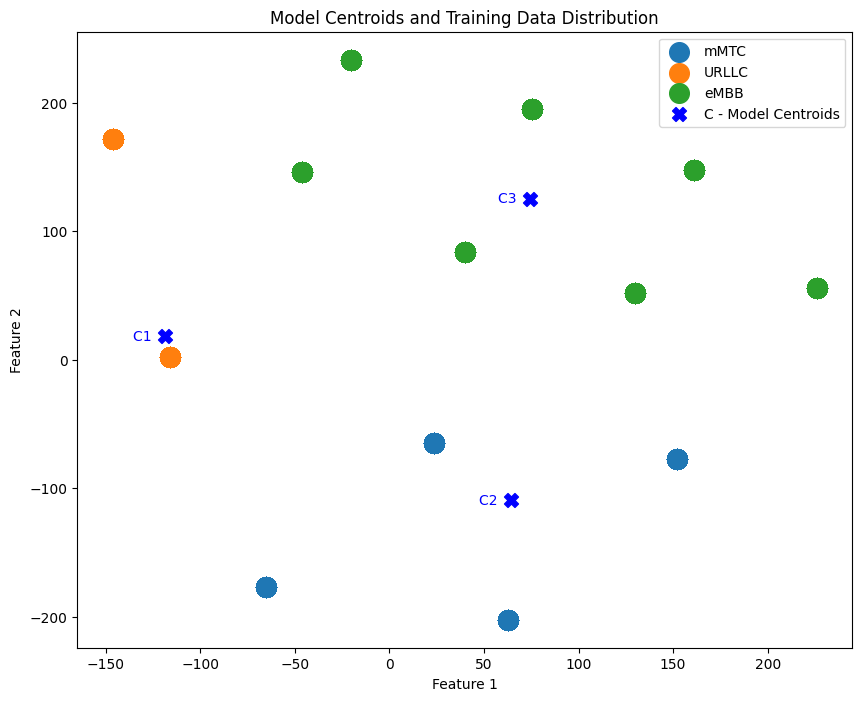

In [82]:
# Plot the scatter plot with different colors for the training data
plt.figure(figsize=(10, 8))
# comeback to fix data
slice_types = data_unlabelled['slice Type'].unique();
for slice_type in slice_types:
    cluster_data_train = X_train_with_cluster_labels[X_train_with_cluster_labels['cluster_label'] == slice_type]
    plt.scatter(cluster_data_train[data_unlabelled.columns[0]], cluster_data_train[data_unlabelled.columns[1]], s=200, label=slice_type)

# Plot the Model Centroids
plt.scatter(kmeans_model_centroids[:, 0], kmeans_model_centroids[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
for i, centroid in enumerate(kmeans_model_centroids):
    plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

plt.xlabel(data_unlabelled.columns[0])
plt.ylabel(data_unlabelled.columns[1])
plt.title('Model Centroids and Training Data Distribution')
plt.legend()
# plt.xlim(-150, 150)  # Set your desired x-axis range
# plt.ylim(-150, 150)  # Set your desired y-axis range
plt.show()

## **Minimum Distance of C1 from Ground Truths**

In [83]:
dist_C1_GT_slice1 = np.linalg.norm(C1 - GT_slice1)
dist_C1_GT_slice1

188.89265

In [84]:
dist_C1_GT_slice2 = np.linalg.norm(C1 - GT_slice2)
dist_C1_GT_slice2

219.24016

In [85]:
dist_C1_GT_slice3 = np.linalg.norm(C1 - GT_slice3)
dist_C1_GT_slice3

16.441471

In [86]:
# Determine the closest centroid
min_dist_C1 = min(dist_C1_GT_slice1, dist_C1_GT_slice2, dist_C1_GT_slice3)

if min_dist_C1 == dist_C1_GT_slice1:
    closest_centroid_C1 = "eMBB"
    arr[0] = C1
elif min_dist_C1 == dist_C1_GT_slice2:
    closest_centroid_C1 = "mMTC"
    arr[0] = C2
else:
    closest_centroid_C1 = "URLLC"
    arr[0] = C3

print("C1 has minimum distance of ", min_dist_C1, "from the Model's Centroid/Cluster", closest_centroid_C1)
arr

C1 has minimum distance of  16.441471 from the Model's Centroid/Cluster URLLC


array([[ 74.36135101, 125.4124527 ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ]])

## **Minimum Distance of C2 from Ground Truths**

In [87]:
dist_C2_GT_slice1 = np.linalg.norm(C2 - GT_slice1)
dist_C2_GT_slice1

206.80626

In [88]:
dist_C2_GT_slice2 = np.linalg.norm(C2 - GT_slice2)
dist_C2_GT_slice2

11.274713

In [89]:
dist_C2_GT_slice3 = np.linalg.norm(C2 - GT_slice3)
dist_C2_GT_slice3

211.98582

In [90]:
# Determine the closest centroid
min_dist_C2 = min(dist_C2_GT_slice1, dist_C2_GT_slice2, dist_C2_GT_slice3)

if min_dist_C2 == dist_C2_GT_slice1:
    closest_centroid_C2 = "eMBB"
    arr[1] = C1
elif min_dist_C2 == dist_C2_GT_slice2:
    closest_centroid_C2 = "mMTC"
    arr[1] = C2
else:
    closest_centroid_C2 = "URLLC"
    arr[1] = C3

print("C2 has minimum distance of ", min_dist_C2, "from the Model's Centroid/Cluster", closest_centroid_C2)
arr

C2 has minimum distance of  11.274713 from the Model's Centroid/Cluster mMTC


array([[  74.36135101,  125.4124527 ],
       [  64.30732727, -109.47766876],
       [   0.        ,    0.        ]])

## **Minimum Distance of C3 from Ground Truths**

In [91]:
dist_C3_GT_slice1 = np.linalg.norm(C3 - GT_slice1)
dist_C3_GT_slice1

35.4973

In [92]:
dist_C3_GT_slice2 = np.linalg.norm(C3 - GT_slice2)
dist_C3_GT_slice2

224.0056

In [93]:
dist_C3_GT_slice3 = np.linalg.norm(C3 - GT_slice3)
dist_C3_GT_slice3

226.54842

In [94]:
# Determine the closest centroid
min_dist_C3 = min(dist_C3_GT_slice1, dist_C3_GT_slice2, dist_C3_GT_slice3)

if min_dist_C3 == dist_C3_GT_slice1:
    closest_centroid_C3 = "eMBB"
    arr[2] = C1
elif min_dist_C3 == dist_C3_GT_slice2:
    closest_centroid_C3 = "mMTC"
    arr[2] = C2
else:
    closest_centroid_C3 = "URLLC"
    arr[2] = C3

print("C3 has minimum distance of ", min_dist_C3, "from the Model's Centroid/Cluster", closest_centroid_C3)
arr

C3 has minimum distance of  35.4973 from the Model's Centroid/Cluster eMBB


array([[  74.36135101,  125.4124527 ],
       [  64.30732727, -109.47766876],
       [-118.73563385,   18.47836304]])

## **Model Centroids Mapping to Labels**

In [95]:
print("C1 has minimum distance of ", min_dist_C1, "from the Model's Centroid/Cluster", closest_centroid_C1)
print("C2 has minimum distance of ", min_dist_C2, "from the Model's Centroid/Cluster", closest_centroid_C2)
print("C3 has minimum distance of ", min_dist_C3, "from the Model's Centroid/Cluster", closest_centroid_C3)

C1 has minimum distance of  16.441471 from the Model's Centroid/Cluster URLLC
C2 has minimum distance of  11.274713 from the Model's Centroid/Cluster mMTC
C3 has minimum distance of  35.4973 from the Model's Centroid/Cluster eMBB


### **Before Mapping the Labels**

In [96]:
kmeans_model

KMeans(n_clusters=3, random_state=42)

In [97]:
kmeans_model_centroids

array([[-118.735634,   18.478363],
       [  64.30733 , -109.47767 ],
       [  74.36135 ,  125.41245 ]], dtype=float32)

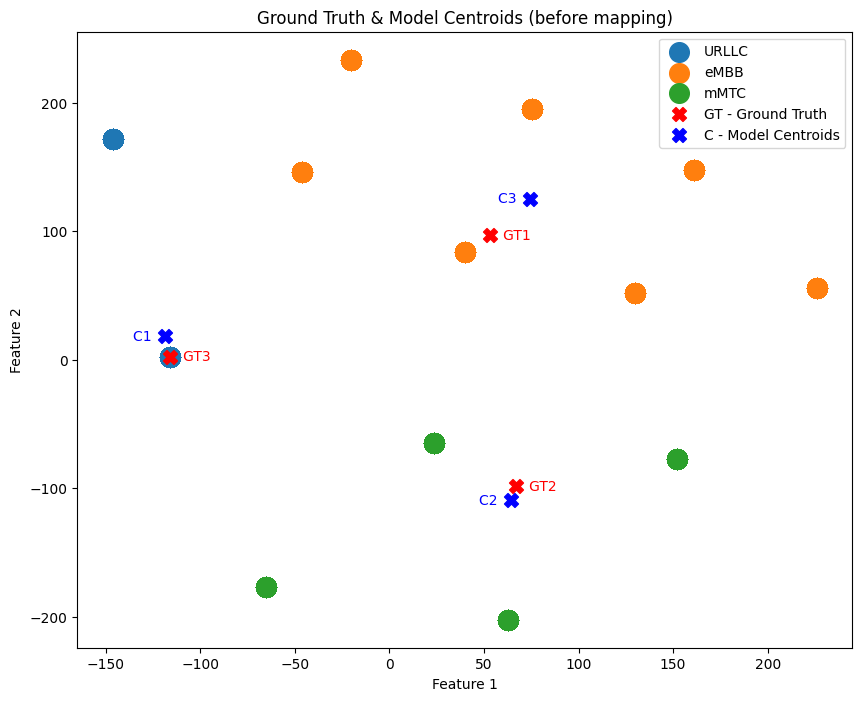

In [98]:
# Plot the scatter plot with different colors for the training data
plt.figure(figsize=(10, 8))

# for cluster in range(1, len(np.unique(kmeans_model_labels_aligned))+1):
slice_types = np.unique(data_unlabelled['slice Type']);
for slice_type in slice_types:
    cluster_data_train = X_train_with_cluster_labels[X_train_with_cluster_labels['cluster_label'] == slice_type]
    plt.scatter(cluster_data_train[data_unlabelled.columns[0]], cluster_data_train[data_unlabelled.columns[1]], s=200, label=slice_type)

# Plot the Ground Truth Centroids
plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
for i, centroid in enumerate(GT_centroids):
    plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

# Plot the Model Centroids
plt.scatter(kmeans_model_centroids[:, 0], kmeans_model_centroids[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
for i, centroid in enumerate(kmeans_model_centroids):
    plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

plt.xlabel(data_unlabelled.columns[0])
plt.ylabel(data_unlabelled.columns[1])
plt.title('Ground Truth & Model Centroids (before mapping)')
plt.legend()
# plt.xlim(-150, 150)  # Set your desired x-axis range
# plt.ylim(-150, 150)  # Set your desired y-axis range
plt.show()

### **After Mapping the Labels**

In [99]:
kmeans_model_mod = kmeans_model
kmeans_model_mod

KMeans(n_clusters=3, random_state=42)

In [100]:
kmeans_model_mod.cluster_centers_ = arr

In [101]:
kmeans_model_centroids_mapped = kmeans_model_mod.cluster_centers_
kmeans_model_centroids_mapped

array([[  74.36135101,  125.4124527 ],
       [  64.30732727, -109.47766876],
       [-118.73563385,   18.47836304]])

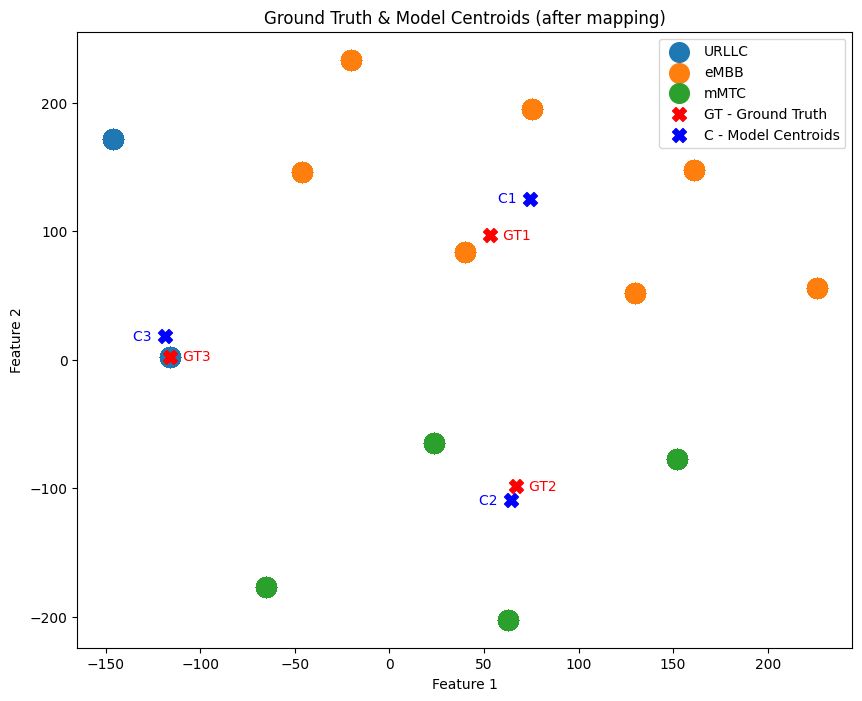

In [102]:
# Plot the scatter plot with different colors for the training data
plt.figure(figsize=(10, 8))

# for cluster in range(1, len(np.unique(kmeans_model_labels_aligned))+1):
slice_types = np.unique(data_unlabelled['slice Type']);
for slice_type in slice_types:
    cluster_data_train = X_train_with_cluster_labels[X_train_with_cluster_labels['cluster_label'] == slice_type]
    plt.scatter(cluster_data_train[data_unlabelled.columns[0]], cluster_data_train[data_unlabelled.columns[1]], s=200, label=slice_type)

# sns.scatterplot(x=data.columns[0], y=data.columns[1], hue=X_train_with_cluster_labels['cluster_label'], data=X_train_with_cluster_labels, palette='Set1', s=200)

# Plot the Ground Truth Centroids
plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
for i, centroid in enumerate(GT_centroids):
    plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

# Plot the Model Centroids
plt.scatter(kmeans_model_centroids_mapped[:, 0], kmeans_model_centroids_mapped[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
for i, centroid in enumerate(kmeans_model_centroids_mapped):
    plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

plt.xlabel(data_unlabelled.columns[0])
plt.ylabel(data_unlabelled.columns[1])
plt.title('Ground Truth & Model Centroids (after mapping)')
plt.legend()
# plt.xlim(-150, 150)  # Set your desired x-axis range
# plt.ylim(-150, 150)  # Set your desired y-axis range
plt.show()

# **Model Testing**

In [103]:
# Convert X_test to float32
X_test = X_test.astype(np.float64)
X_test

,Feature 1,Feature 2
31204,-115.815147,2.298351
6481,226.130371,55.945343
30493,-115.815147,2.298351
3660,130.110672,52.006916
24171,23.389521,-64.629578
...,...,...
25524,23.389521,-64.629578
38025,-65.404762,-177.192078
361,62.887115,-202.281113
9485,-20.426746,233.535278


In [104]:
X_test.dtypes

,0
Feature 1,float64
Feature 2,float64


In [105]:
# Predict the labels for the test data
# y_pred = kmeans_model.predict(X_test)
y_pred = kmeans_model_mod.predict(X_test)
y_pred

array([2, 0, 2, ..., 1, 0, 1], dtype=int32)

In [106]:
y_pred_aligned = y_pred + 1
y_pred_aligned

array([3, 1, 3, ..., 2, 1, 2], dtype=int32)

In [107]:
len(y_pred_aligned)

2662

In [108]:
np.unique(y_pred_aligned)

array([1, 2, 3], dtype=int32)

In [109]:
from collections import Counter

# Original labels (true labels) corresponding to X_train
# true_labels = np.array([...])  # Replace with your original labels array
true_labels = np.array(y_test)  # Replace with your original labels array

# Create a mapping from KMeans cluster labels to the original labels
label_mapping = {}

for y_pred_datapoint in np.unique(y_pred_aligned):
    # Get the indices of data points that belong to the current cluster
    y_pred_indices = np.where(y_pred_aligned == y_pred_datapoint)[0]

    # Get the true labels of these data points
    y_pred_true_labels = true_labels[y_pred_indices]

    # Find the most common true label in this cluster
    most_common_label = Counter(y_pred_true_labels).most_common(1)[0][0]

    # Map the KMeans label to this most common true label
    label_mapping[y_pred_datapoint] = most_common_label

# Now label_mapping will give you the correct label for each KMeans cluster
print(label_mapping)

{1: 'eMBB', 2: 'mMTC', 3: 'URLLC'}


In [110]:
# Mapping dictionary
# label_mapping = {1: 'eMBB', 2: 'mMTC', 3: 'URLLC'}

# Vectorize the mapping function
replace_labels = np.vectorize(label_mapping.get)

# Replace labels
y_pred_aligned_replaced = replace_labels(y_pred_aligned)
y_pred_aligned_replaced

array(['URLLC', 'eMBB', 'URLLC', ..., 'mMTC', 'eMBB', 'mMTC'], dtype='<U5')

## **Update testing dataset with labels**

In [111]:
# Get the column names from the original DataFrame
X_test_column_names = X_test.columns.tolist()

# Convert X_test to a pandas DataFrame
# X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)

# Create a copy to avoid modifying the original DataFrame
X_test_with_labels = X_test.copy()

# Resetting indices to avoid alignment issues
X_test_with_labels.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# y_pred.reset_index(drop=True, inplace=True)

actual_label = pd.Series(y_test, name='actual_label')
predicted_label = pd.Series(y_pred_aligned_replaced, name='predicted_label')

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['actual_label'] = actual_label

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['predicted_label'] = predicted_label

In [112]:
# Display the Updated Table
X_test_with_labels[:20]

,Feature 1,Feature 2,actual_label,predicted_label
0,-115.815147,2.298351,URLLC,URLLC
1,226.130371,55.945343,eMBB,eMBB
2,-115.815147,2.298351,URLLC,URLLC
3,130.110672,52.006916,eMBB,eMBB
4,23.389521,-64.629578,mMTC,mMTC
5,152.200500,-77.581436,mMTC,mMTC
6,152.200500,-77.581436,mMTC,mMTC
7,-146.477142,172.179214,eMBB,URLLC
8,-20.426746,233.535278,eMBB,eMBB
9,152.200500,-77.581436,mMTC,mMTC


## **Predicted Label Analysis**

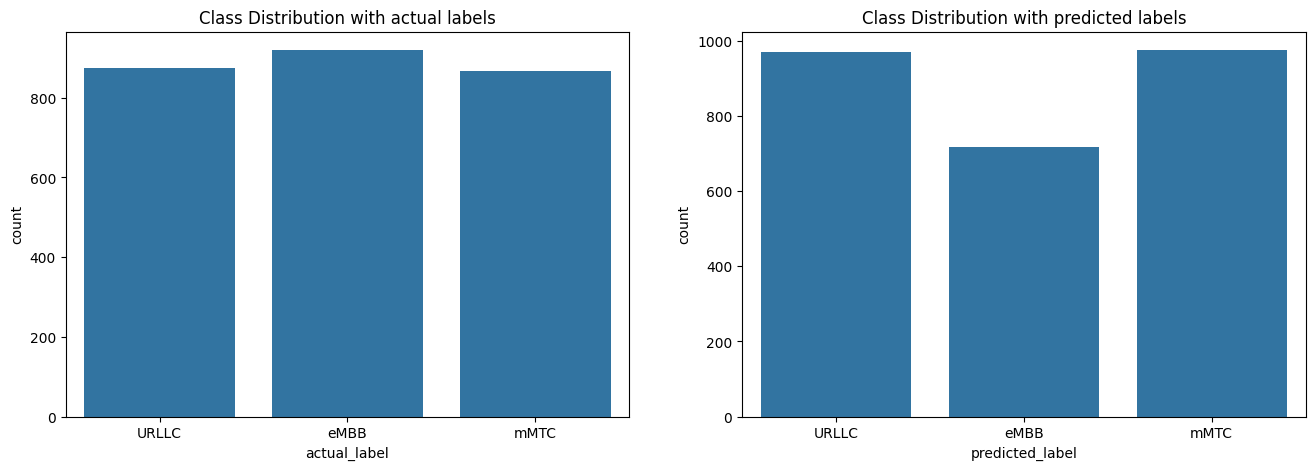

In [113]:
# Class Distribution

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(x=actual_label, ax=axs[0])
axs[0].set_title('Class Distribution with actual labels')

sns.countplot(x=predicted_label, ax=axs[1])
axs[1].set_title('Class Distribution with predicted labels')

plt.show()

In [114]:
# Calculate the Silhouette Score
silhouette_score_test = silhouette_score(X_test, predicted_label)

# Print or use the Silhouette Score for evaluation
print("Silhouette Score:", silhouette_score_test)

Silhouette Score: 0.5893894977509511


In [115]:
# Calculate Davies-Bouldin Index
db_index_test = metrics.davies_bouldin_score(X_test, predicted_label)

# Print or use the DBI for evaluation
print("Davies-Bouldin Index for Testing(Labelled) Data:", db_index_test)

Davies-Bouldin Index for Testing(Labelled) Data: 0.746382785592317


In [116]:
# Calculate the Adjusted Rand Index - It is the measure of the similarity of datapoints presents in the clusters and it ranges between 0 and 1
ar_index_test = adjusted_rand_score(actual_label, predicted_label)

# Print or use the ARI for evaluation
print("Adjusted Rand Index for Testing(Labelled) Data:", ar_index_test)

Adjusted Rand Index for Testing(Labelled) Data: 0.789653332529558


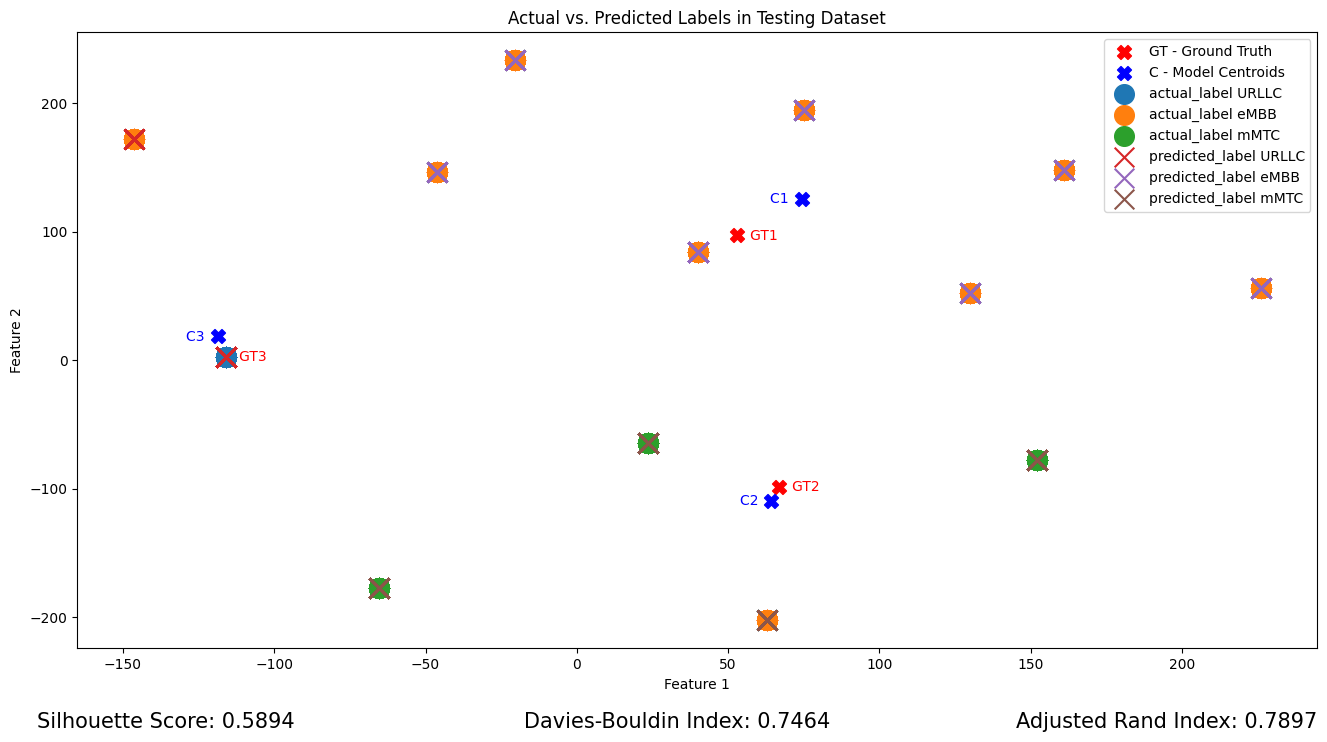

In [117]:
# Plot the scatter plot with different colors for the testing data
plt.figure(figsize=(16, 8))

# Plot the Ground Truth Centroids
plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
for i, centroid in enumerate(GT_centroids):
    plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

# Plot the Model Centroids
plt.scatter(kmeans_model_centroids_mapped[:, 0], kmeans_model_centroids_mapped[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
for i, centroid in enumerate(kmeans_model_centroids_mapped):
    plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

slice_types = np.unique(data_unlabelled['slice Type']);
# Plot Actual Labels in Testing Dataset
# for cluster in range(1, len(np.unique(y_pred_aligned))+1):
for slice_type in slice_types:
    # cluster_data_test = X_test_with_labels[X_test_with_labels['actual_label'] == cluster]
    cluster_data_test = X_test_with_labels[actual_label == slice_type]
    plt.scatter(cluster_data_test[data_unlabelled.columns[0]], cluster_data_test[data_unlabelled.columns[1]], s=200, label=f'actual_label {slice_type}')
# sns.scatterplot(x=data.columns[0], y=data.columns[1], hue=X_test_with_labels['actual_label'], data=X_test_with_labels, palette='Set1', s=200)

# Plot Predicted Labels in Testing Dataset
# for cluster in range(1, len(np.unique(y_pred_aligned))+1):
for slice_type in slice_types:
    # cluster_data_test = X_test_with_labels[X_test_with_labels['predicted_label'] == cluster]
    cluster_data_test = X_test_with_labels[predicted_label == slice_type]
    plt.scatter(cluster_data_test[data_unlabelled.columns[0]], cluster_data_test[data_unlabelled.columns[1]], marker='x', s=200, label=f'predicted_label {slice_type}')
# sns.scatterplot(x=data.columns[0], y=data.columns[1], hue=X_test_with_labels['predicted_label'], data=X_test_with_labels, palette='Set1', s=200, marker='x')

# Adding a footer or note
plt.figtext(0.1, 0.01, f'Silhouette Score: {silhouette_score_test:.4f}', ha="left", fontsize=15)
plt.figtext(0.5, 0.01, f'Davies-Bouldin Index: {db_index_test:.4f}', ha="center", fontsize=15)
plt.figtext(0.9, 0.01, f'Adjusted Rand Index: {ar_index_test:.4f}', ha="right", fontsize=15)

plt.xlabel(data_unlabelled.columns[0])
plt.ylabel(data_unlabelled.columns[1])
plt.title('Actual vs. Predicted Labels in Testing Dataset')
plt.legend()
# plt.xlim(-150, 150)  # Set your desired x-axis range
# plt.ylim(-150, 150)  # Set your desired y-axis range
plt.show()

In [118]:
# # Plot the scatter plot with different colors for the testing data
# plt.figure(figsize=(16, 8))

# # Plot Actual Labels in Testing Dataset
# scatter1 = plt.scatter(X_test_with_labels[data_unlabelled.columns[0]], X_test_with_labels[data_unlabelled.columns[1]], c = actual_label, cmap='copper', edgecolors='k', alpha=1.0, s=300, marker='o')
# # Plot Predicted Labels in Testing Dataset
# scatter2 = plt.scatter(X_test_with_labels[data_unlabelled.columns[0]], X_test_with_labels[data_unlabelled.columns[1]], c = predicted_label, cmap='winter', edgecolors='k', alpha=0.7, s=300, marker='x')

# # Add colorbar for better interpretation of Cluster Labels
# cbar1 = plt.colorbar(scatter1)
# cbar1.set_label('Actual Cluster Label')
# cbar2 = plt.colorbar(scatter2)
# cbar2.set_label('Predicted Cluster Label')

# # Plot the Ground Truth Centroids
# plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
# for i, centroid in enumerate(GT_centroids):
#     plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

# # Plot the Model Centroids
# plt.scatter(kmeans_model_centroids_mapped[:, 0], kmeans_model_centroids_mapped[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
# for i, centroid in enumerate(kmeans_model_centroids_mapped):
#     plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

# # Plot ovals around centroids to denote clusters
# for i in range((len(np.unique(kmeans_model_labels_aligned)))):
#     cluster_points = X_train[kmeans_model_labels_aligned == (i+1)]
#     # Calculate the radii along the x and y axes
#     x_radius = np.max(np.abs(cluster_points[X_train.columns[0]] - kmeans_model_centroids_mapped[i, 0]))
#     y_radius = np.max(np.abs(cluster_points[X_train.columns[1]] - kmeans_model_centroids_mapped[i, 1]))
#     ellipse = Ellipse((kmeans_model_centroids_mapped[i, 0], kmeans_model_centroids_mapped[i, 1]), 3.2 * x_radius, 0.6 * y_radius, color='red', alpha=0.1)
#     plt.gca().add_patch(ellipse)
#     # circle = Circle((kmeans_model_centroids_mapped[i, 0], kmeans_model_centroids_mapped[i, 1]), 1 * x_radius, color='red', alpha=0.1)
#     # plt.gca().add_patch(circle)

# # Adding a footer or note
# plt.figtext(0.1, 0.01, f'Silhouette Score: {silhouette_score_test:.4f}', ha="left", fontsize=15)
# plt.figtext(0.5, 0.01, f'Davies-Bouldin Index: {db_index_test:.4f}', ha="center", fontsize=15)
# plt.figtext(0.9, 0.01, f'Adjusted Rand Index: {ar_index_test:.4f}', ha="right", fontsize=15)

# plt.xlabel(data_unlabelled.columns[0])
# plt.ylabel(data_unlabelled.columns[1])
# plt.title('Actual vs. Predicted Labels in Testing Dataset')
# plt.legend()
# # plt.xlim(-150, 150)  # Set your desired x-axis range
# # plt.ylim(-150, 150)  # Set your desired y-axis range
# plt.show()

### **Confusion Matrix using built-in libraries**

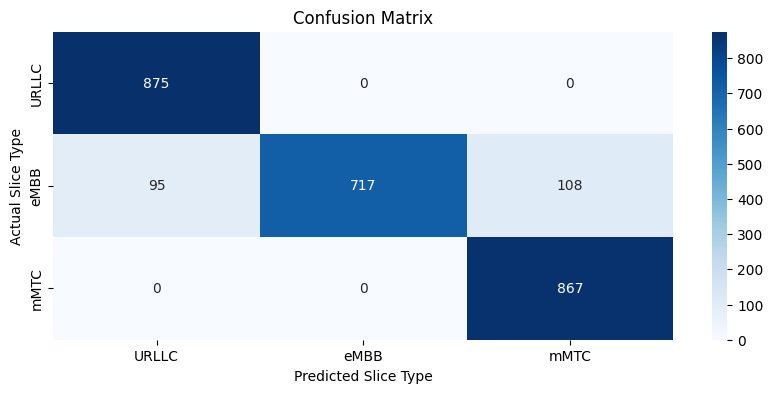


 42 42 42


In [119]:
# Confusion Matrix
plt.figure(figsize=(10, 4))
cm = confusion_matrix(actual_label, predicted_label)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(actual_label), yticklabels=np.unique(predicted_label))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')
plt.show()
print("\n", a, b, c)

In [120]:
# Calculate accuracy
print("Accuracy", accuracy_score(actual_label, predicted_label))

# Calculate precision
print("Precision", precision_score(actual_label, predicted_label, average='weighted'))

# Calculate recall
print("Recall", recall_score(actual_label, predicted_label, average='weighted'))

# Calculate F1-score
print("F1-score", f1_score(actual_label, predicted_label, average='weighted'))

Accuracy 0.9237415477084898
Precision 0.9317307290136805
Recall 0.9237415477084898
F1-score 0.9211214046553394


In [121]:
conf_matrix = cm
conf_matrix

array([[875,   0,   0],
       [ 95, 717, 108],
       [  0,   0, 867]])

In [122]:
# # True Positives (TP) for each class
# TP_class0 = conf_matrix[0, 0]
# TP_class1 = conf_matrix[1, 1]
# TP_class2 = conf_matrix[2, 2]

# # False Positives (FP) for each class
# FP_class0 = np.sum(conf_matrix[0, :]) - TP_class0
# FP_class1 = np.sum(conf_matrix[1, :]) - TP_class1
# FP_class2 = np.sum(conf_matrix[2, :]) - TP_class2

# # False Negatives (FN) for each class
# FN_class0 = np.sum(conf_matrix[:, 0]) - TP_class0
# FN_class1 = np.sum(conf_matrix[:, 1]) - TP_class1
# FN_class2 = np.sum(conf_matrix[:, 2]) - TP_class2

# # True Negatives (TN) for each class
# TN_class0 = np.sum(conf_matrix) - TP_class0 - FP_class0 - FN_class0
# TN_class1 = np.sum(conf_matrix) - TP_class1 - FP_class1 - FN_class1
# TN_class2 = np.sum(conf_matrix) - TP_class2 - FP_class2 - FN_class2

# # Overall True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
# TP = TP_class0 + TP_class1 + TP_class2
# FP = FP_class0 + FP_class1 + FP_class2
# FN = FN_class0 + FN_class1 + FN_class2
# TN = TN_class0 + TN_class1 + TN_class2

# # Display the values
# print("True Positives (TP):", TP)
# print("False Positives (FP):", FP)
# print("False Negatives (FN):", FN)
# print("True Negatives (TN):", TN)

In [123]:
# acc = (TP + TN)/(TP + TN + FP + FN)
# pres = TP/(TP + FP)
# rec = TP/(TP + FN)
# f1 = 2 * ((pres * rec)/(pres + rec))
# print("Accuracy", acc)
# print("Precision", pres)
# print("Recall", rec)
# print("F1-score", f1)

### **Confusion Matrix using Mathematical Equation**

In [124]:
# actual_label

In [125]:
# predicted_label

In [126]:
# # Initialize counts for TP, FP, FN, and TN for each class
# TP_class = [0, 0, 0]
# FP_class = [0, 0, 0]
# FN_class = [0, 0, 0]
# TN_class = [0, 0, 0]

# # Iterate over each sample
# for actual, predicted in zip(actual_label, predicted_label):
#     # Iterate over each class
#     for c in range(len(np.unique(actual_label))):
#         # Increment counts based on the classification result
#         if actual == c+1 and predicted == c+1:  # True Positives
#             TP_class[c] += 1
#         elif actual == c+1 and predicted != c+1:  # False Negatives
#             FN_class[c] += 1
#         elif actual != c+1 and predicted == c+1:  # False Positives
#             FP_class[c] += 1
#         elif actual != c+1 and predicted != c+1:  # True Negatives
#             TN_class[c] += 1

# # Print the results for each class
# print("True Positives (TP):", TP_class)
# print("False Positives (FP):", FP_class)
# print("False Negatives (FN):", FN_class)
# print("True Negatives (TN):", TN_class)
# print("\n")

# # Print the results for each class and overall
# for c in range(len(np.unique(actual_label))):
#     print(f"Class {c+1}:")
#     print("True Positives (TP):", TP_class[c])
#     print("False Positives (FP):", FP_class[c])
#     print("False Negatives (FN):", FN_class[c])
#     print("True Negatives (TN):", TN_class[c])
#     print("\n")

# # Compute overall TP, FP, FN, TN
# TP = sum(TP_class)
# FP = sum(FP_class)
# FN = sum(FN_class)
# TN = sum(TN_class)

# # Print the overall results
# print("Overall:")
# print("True Positives (TP):", TP)
# print("False Positives (FP):", FP)
# print("False Negatives (FN):", FN)
# print("True Negatives (TN):", TN)

In [127]:
# # Create the confusion matrix array for each class
# for c in range(len(np.unique(actual_label))):
#     print("\n", f"Class {c+1}:")
#     conf_matrix = np.array([
#         [TP_class[c], FP_class[c]],
#          [FN_class[c], TN_class[c]]
#         ])
#     print(conf_matrix, "\n")

#     # Set labels for the current class
#     if c == 0:
#         current_class_label = '1'
#     elif c == 1:
#         current_class_label = '2'
#     elif c == 2:
#         current_class_label = '3'
#     else:
#         current_class_label = 'Others'

#     # Confusion Matrix
#     plt.figure(figsize=(8, 5))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[current_class_label, 'Others'], yticklabels=[current_class_label, 'Others'])
#     plt.title(f'Confusion Matrix Slice Type {c+1}')
#     plt.xlabel('Predicted Slice Type')
#     plt.ylabel('Actual Slice Type')
#     plt.show()
#     print()
#     accuracy = (TP_class[c] + TN_class[c])/(TP_class[c] + TN_class[c] + FP_class[c] + FN_class[c])
#     precision = TP_class[c]/(TP_class[c] + FP_class[c])
#     recall = TP_class[c]/(TP_class[c] + FN_class[c])
#     f1score = 2 * ((precision * recall)/(precision + recall))
#     print("Accuracy", accuracy)
#     print("Precision", precision)
#     print("Recall", recall)
#     print("F1-score", f1score)
#     print()

In [128]:
# # Overall
# overall_accuracy = (TP + TN)/(TP + TN + FP + FN)
# overall_precision = TP/(TP + FP)
# overall_recall = TP/(TP + FN)
# overall_f1score = 2 * ((precision * recall)/(precision + recall))
# print("Accuracy", overall_accuracy)
# print("Precision", overall_precision)
# print("Recall", overall_recall)
# print("F1-score", overall_f1score)

# **SYNC NOTEBOOKS**

In [129]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp12 - Slice_Identification_SemiSupML_undersampling_tsne.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'